In [1]:
# imports 
import emp_preprocessing as ep
import emp_fake_data as ef
import emp_metrics as em
import networkx as nx
import functions as fct
import numpy as np
import pandas as pd
import parameters as par
from graphics import ClassGraphics
import os

# parameters
path_results = "./results/empirical_results/"
Graphics = ClassGraphics(None,plot_period=1000)

# 1 data preprocessing

In [2]:
# load fake data (exposure)
df_exposures = ef.get_df_exposures(lines=int(1e5))
dic_rev_repo_exp_adj = ep.build_from_exposures(df_exposures=df_exposures,path=f"{path_results}data/")

# build finrep data @NA: add here a read csv of the data with the total assets
df_finrep = ef.get_df_finrep()

100%|██████████| 100000/100000 [00:34<00:00, 2935.10it/s]


In [10]:
# pickle (faster)
dic_rev_repo_exp_adj = ep.load_dic_obs_matrix_reverse_repo(path=f"{path_results}data/")
df_finrep = ef.get_df_finrep()

# 2 metrics measurement

In [4]:
os.makedirs(f"{path_results}accounting_view/", exist_ok=True)

### 2.1.2 accounting items

#### A - static view, distribution across banks 

In [15]:
# accounting data per bank on a given date (to be filled in with FINREP data => should I do a proposal ? can we confirm the form of the FINREP table )
df_banks = pd.read_csv("./results/single_run/df_banks.csv", index_col=0)


# add a computation of the ratios over total assets

In [2]:
import parameters as par
par.list_test

['test']

In [20]:
import parameters as par
# par.dic_test
# dic_test = {"test": "test"}
# dic_test
par.list_test

AttributeError: module 'parameters' has no attribute 'list_test'

In [9]:
# plot all power law tests
Graphics.plot_all_power_law_tests(df_banks, f"{path_results}/power_laws/")

Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: inva

#### B - dynamic view, distribution across time

In [ ]:
# build arr_total_assets
arr_total_assets = ep.build_arr_total_assets(df_finrep, f"{path_results}accounting_view/")

deposits shocks: donnée d'entrée : panel data avec date, lei, montant de depot   (frequence journaliere)

#### C - mixed view

## 2.2. exposure view

In [ ]:
os.makedirs(f"{path_results}exposure_view/", exist_ok=True)

In [ ]:
# get aggregated adjency matrices
dic_arr_binary_adj = ep.build_rolling_binary_adj(dic_rev_repo_exp_adj=dic_rev_repo_exp_adj,path=f"{path_results}data/")

In [ ]:
# pickle (faster)
dic_arr_binary_adj = ep.load_dic_arr_binary_adj(path=f"{path_results}data/")

### 2.2.1 jaccard

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get jaccard
df_jaccard = em.get_rev_repo_exposure_stats(dic_arr_binary_adj, days, path=path_results)
Graphics.plot_trajectory(
            df=df_jaccard,
            cols=df_jaccard.columns,
            file_name=f"{path_results}exposure_view/jaccard_index.pdf")

get jaccard


100%|██████████| 20833/20833 [00:04<00:00, 4213.91it/s]


### 2.2.2 density

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get density
df_density = em.get_density(dic_arr_binary_adj, days, path=path_results)
Graphics.plot_trajectory(
            df=df_density,
            cols=df_density.columns,
            file_name=f"{path_results}exposure_view/network_density.pdf",
        )

get density


100%|██████████| 20833/20833 [00:04<00:00, 4219.06it/s]


### 2.2.3 degree distribution 

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get degree distribution
dic_in_degree, dic_out_degree, dic_degree = em.get_degree_distribution(dic_arr_binary_adj, path=f"{path_results}exposure_view/degree_distribution/")
Graphics.plot_degree_distribution(dic_in_degree,
    dic_out_degree,
    days,
    f"{path_results}exposure_view/degree_distribution/")


get degree distribution


100%|██████████| 20834/20834 [00:10<00:00, 1904.09it/s]


### 2.2.4 degree stats

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get av. degree
df_degree_stats = em.get_degree_stats(dic_degree, days, path=path_results)
Graphics.plot_trajectory(
            df=df_degree_stats,
            cols=df_degree_stats.columns,
            file_name=f"{path_results}exposure_view/degree_stats.pdf",
        )

get degree stats


100%|██████████| 20833/20833 [00:15<00:00, 1343.24it/s]


### 2.2.5 degree per asset

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())
bank_ids = list(dic_rev_repo_exp_adj.values())[0].index

# select the days and banks (common between the 2 lists)
finrep_days = list(df_finrep["date"])
finrep_bank_ids = list(set(df_finrep["lei"]))
plot_days = fct.list_intersection(days, finrep_days)

# plot
Graphics.plot_degree_per_asset(arr_total_assets,dic_degree,bank_ids,days,f"{path_results}exposure_view/degree_per_asset/",plot_days=plot_days,finrep_days=finrep_days, finrep_bank_ids=finrep_bank_ids)

### 2.2.6 core periphery

In [ ]:
arr_rev_repo_exp_adj = ep.convert_dic_to_array(dic_rev_repo_exp_adj)
days = list(dic_rev_repo_exp_adj.keys())

# run cp tests
Graphics.plot_cp_test(dic_arr_binary_adj, algos=par.cp_algos,days=days, path_results=f"{path_results}exposure_view/", opt_agg=True)
Graphics.plot_cp_test(arr_rev_repo_exp_adj, algos=par.cp_algos, days=days, path_results=f"{path_results}exposure_view/", opt_agg=False)

run core-periphery tests
core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 189.78it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 608.23it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1048.68it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1037.92it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 914.20it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1043.11it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1045.13it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1047.88it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 952.84it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1047.79it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1050.76it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1051.51it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1054.22it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1043.85it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1042.14it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 955.55it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1052.49it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1057.23it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1056.38it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1050.55it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1052.58it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1038.06it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 611.55it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 555.91it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 558.53it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 555.13it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 555.54it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 555.62it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 558.36it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 556.82it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 558.70it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.09it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 556.99it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 557.33it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 556.66it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.52it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 560.17it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 558.24it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 556.25it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 557.20it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.88it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 565.34it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 567.31it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 557.93it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 614.38it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.23it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 576.12it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.92it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.57it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.24it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.67it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.17it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 574.44it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 576.01it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.24it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 129.11it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.00it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.22it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.50it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.41it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.72it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.10it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.66it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.16it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 566.38it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 566.54it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 50.02it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.96it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:03<00:00, 30.93it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.71it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.86it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.34it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.47it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.18it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.92it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:03<00:00, 32.16it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.66it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.78it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.96it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.22it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.31it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.22it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.47it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.03it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.27it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.17it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.39it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.98it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3971.84it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2835.48it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2783.62it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2817.11it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2917.07it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2916.84it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2902.35it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2860.06it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2813.21it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2893.36it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2920.28it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2920.19it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2916.21it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2864.47it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2869.67it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2870.04it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2892.66it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2895.76it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2910.71it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2854.37it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2861.52it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2820.57it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1709.74it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1112.18it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1104.93it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1133.23it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1104.37it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1092.02it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1088.36it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1108.40it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1099.20it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1103.74it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1100.36it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1088.99it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1097.14it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1089.76it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1083.46it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1078.95it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1114.58it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1082.97it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1087.80it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1101.46it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1075.17it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1053.46it/s]


core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 191.66it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.73it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.86it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.93it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.96it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.05it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.06it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.02it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.06it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.06it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.81it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.85it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.82it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.94it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.96it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.92it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.89it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.85it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.87it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.19it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.46it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 554.19it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.34it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.29it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.72it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.24it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.94it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.56it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.22it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 543.77it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.28it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.79it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 544.62it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.27it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.11it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.15it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.92it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.27it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.87it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.07it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.36it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.08it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.42it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 578.86it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 503.54it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.47it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.09it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.82it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.76it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.24it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.58it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.46it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.75it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.18it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.66it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.57it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.40it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.19it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.86it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.02it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.72it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.52it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.74it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.56it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 506.69it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:02<00:00, 43.35it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.12it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.92it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.62it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 60.10it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.39it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.64it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.38it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.51it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.45it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.04it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.28it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.42it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.40it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.92it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.77it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.47it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.38it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.79it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 63.38it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.51it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 66.43it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3937.91it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2273.59it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2277.95it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2273.83it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2270.16it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2245.30it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2282.69it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2281.14it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2271.76it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2264.29it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2247.51it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2282.49it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2277.83it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2272.93it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2268.12it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2242.76it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2268.97it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2278.84it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2268.14it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2273.25it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2259.41it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2271.16it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1735.05it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 917.34it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 917.78it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 917.59it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 910.83it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 914.17it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 920.45it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 862.38it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 921.06it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 912.77it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 910.03it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 917.04it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 916.27it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 914.93it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 913.27it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 909.67it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 918.31it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 915.82it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 834.41it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 917.99it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 820.91it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 912.17it/s]


core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 191.92it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.92it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.00it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.96it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.97it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.79it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.97it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.10it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.02it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.04it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.98it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.11it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.00it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.03it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.16it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.12it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.10it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.12it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.23it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 591.99it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 549.03it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.86it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.09it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 549.99it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 547.20it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 546.25it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 546.00it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.96it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.49it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 544.51it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.03it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.84it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 548.51it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.28it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 546.62it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 548.66it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 547.36it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 545.71it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 547.35it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 544.36it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 547.12it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 619.16it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.15it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.73it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.94it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.47it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.46it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.94it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.20it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 538.00it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.52it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.29it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.27it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.95it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.73it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.70it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 542.69it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 543.27it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.76it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 543.36it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.03it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 539.96it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 538.19it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 50.29it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.90it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.73it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.23it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.63it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.42it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.75it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:01<00:00, 68.03it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.89it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 66.83it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:01<00:00, 68.43it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.38it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 68.04it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.51it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.49it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.77it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.24it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:01<00:00, 64.23it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.54it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 68.35it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3944.09it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2277.01it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2249.80it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2283.89it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2288.32it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2275.23it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2255.69it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2297.03it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2288.74it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2273.74it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2244.68it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2277.92it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2274.78it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2271.45it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2243.99it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2215.52it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2197.19it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2193.48it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2217.54it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2213.88it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2216.57it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2198.89it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1670.64it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 893.78it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 850.65it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 887.41it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 898.64it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.93it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 895.06it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 892.96it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 891.31it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.79it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 890.30it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 894.36it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.49it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 873.14it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 893.77it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 897.61it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 896.03it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 891.99it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 897.77it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 824.18it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 894.77it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 894.83it/s]


core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 190.48it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.50it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.43it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.46it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.58it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.46it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.43it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.49it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.14it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.49it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.48it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.50it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.52it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.38it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.40it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.51it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.47it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.43it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.52it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.49it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.22it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.47it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 559.54it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.04it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.83it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.68it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 513.14it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 514.09it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.06it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.28it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.06it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.21it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.98it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.14it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.32it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.68it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.22it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.38it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.75it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 510.61it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 513.36it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.60it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 512.34it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 511.61it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 581.88it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.81it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.76it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.84it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.14it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.25it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.42it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.27it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.47it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 509.18it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.92it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.78it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 507.48it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 508.76it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.80it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 539.26it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 539.24it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.26it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 540.78it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 539.77it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 538.50it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 541.55it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 50.29it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.71it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:01<00:00, 68.56it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.25it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.28it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.56it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.23it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.40it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.43it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:01<00:00, 67.72it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.56it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.94it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.00it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 64.17it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.28it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.03it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.57it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.00it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:01<00:00, 59.32it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.90it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:01<00:00, 58.91it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3717.17it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2209.71it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2211.40it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2208.57it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2193.59it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2186.21it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2212.91it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2208.09it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2198.87it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2182.62it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2208.35it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2215.74it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2204.81it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2179.90it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2215.67it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2208.18it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2201.95it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2186.58it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2214.90it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2218.61it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2199.46it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2183.67it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1668.37it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.23it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:01<00:00, 60.15it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 885.32it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 832.24it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 883.39it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 890.28it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.68it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 894.38it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 890.56it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 891.79it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 891.10it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 888.14it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 894.43it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 893.77it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 880.85it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 895.25it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 892.33it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 893.84it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 895.61it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 895.03it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 890.98it/s]


run core-periphery tests
core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 945.00it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 992.79it/s]

test on day 2025-06-23 00:00:00



100%|██████████| 100/100 [00:00<00:00, 976.69it/s]

test on day 2028-03-19 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1038.00it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1023.53it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 988.76it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1029.09it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1032.74it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1037.65it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1040.93it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1023.60it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1038.03it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1033.60it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1030.12it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 993.85it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1033.88it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1041.41it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1030.31it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 949.41it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1034.33it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1030.02it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.86it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 562.00it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 566.51it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.08it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 555.36it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 564.88it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 548.39it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 552.21it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 553.06it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 554.50it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 550.28it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 553.28it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 556.19it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 552.22it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.31it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 554.28it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 553.55it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 552.12it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 547.82it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 554.67it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 554.10it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 553.77it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 564.10it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.22it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.35it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.24it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.35it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.87it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.56it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.32it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.89it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.14it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.40it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.66it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.13it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.00it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.33it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.75it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.11it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.23it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.39it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.71it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.26it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.47it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 582.86it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.63it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.74it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:02<00:00, 37.99it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 37.68it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.85it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.60it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.71it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.26it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.18it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.43it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 37.04it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.54it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.86it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.77it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:02<00:00, 37.20it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.68it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.76it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.44it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.19it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.01it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:02<00:00, 37.04it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.08it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2710.79it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2700.44it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2703.23it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2769.76it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2684.99it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2750.90it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2754.90it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2771.28it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2701.59it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2701.70it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2696.76it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2691.38it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2728.29it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2723.72it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2763.46it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2891.63it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2872.46it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2844.29it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2719.42it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2749.14it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2753.22it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3079.47it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1077.27it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1076.91it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1099.64it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1083.84it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1082.40it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1075.15it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1056.75it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1068.84it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1081.80it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1074.19it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1083.59it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1091.17it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1085.06it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1054.00it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1078.52it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1076.99it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1071.59it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1075.77it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1071.14it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1069.04it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1099.48it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1199.36it/s]


## 2.3 transaction view

In [ ]:
os.makedirs(f"{path_results}transaction_view/", exist_ok=True)

# 3 tools

## 3.1 examples of density / histogram in log - log

### pareto law

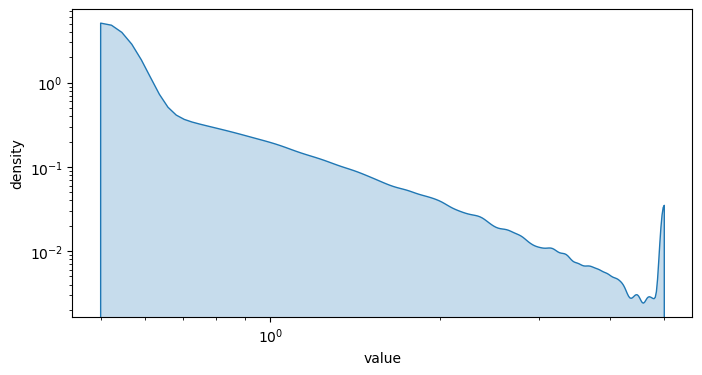

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.pareto(3,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(0.5,5), ax=ax, cut=0, fill=True)
ax.set_xscale('log')

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('value')
ax.set_ylabel('density')

# Show the plot
plt.show()

### student law

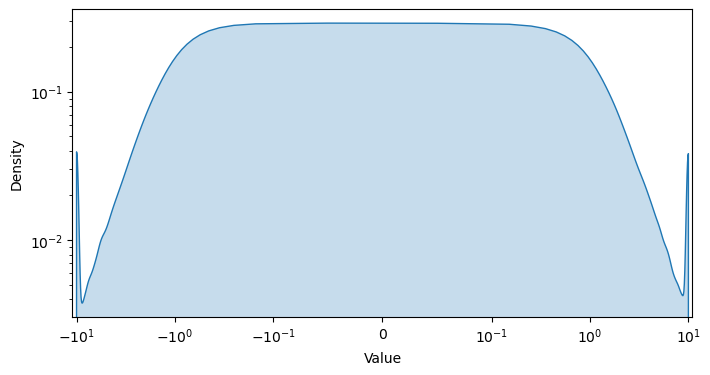

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.standard_t(1,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(-10,10), ax=ax, fill=True, cut=0)
ax.set_xscale('symlog', linthresh=0.1)

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

## 3.2 multiple histogram on the same plot

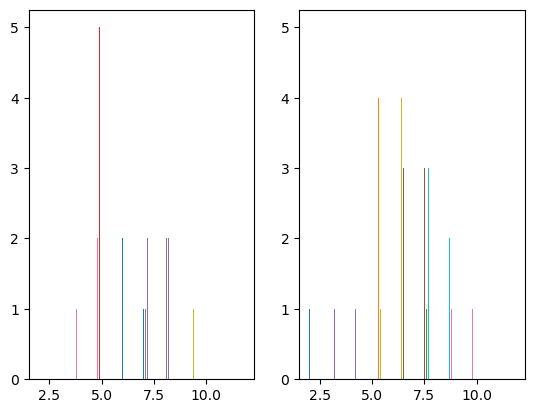

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  i in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1



## 3.3 power low fitting

Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


3.110980911347056
0.9558496468243776


<AxesSubplot: >

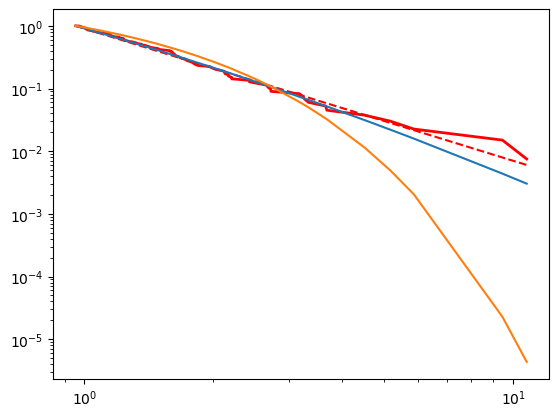

In [ ]:
# fitting
import powerlaw
import numpy as np
sr_data = np.random.pareto(3,size=1000) # data can be list or numpy array
fit = powerlaw.Fit(sr_data)
print(fit.power_law.alpha)
print(fit.power_law.xmin)
R, p = fit.distribution_compare('power_law', 'exponential')
fig2 = fit.plot_ccdf(color = "r", linewidth = 2)
fit.power_law.plot_ccdf(color = "r", linestyle = "--", ax = fig2)
fit.lognormal.plot_ccdf(ax=fig2)
fit.exponential.plot_ccdf(ax=fig2)